# Projet Math: simulation de variable aléatoire

### Question théorique

#### 1)

D'après le théorème de la limite centrale, en appelant $L_i$ la variable donnant le $i^{ème}$ tirage du calcule de la longueur L sachant $Z(x_{j_i})=z(x_{j_i})$ (variables mutuellements indépendantes par construction). On obtient : $$L^★ ≈ \frac{1}{K} \sum _{k=1} ^ {K} l_{k} $$

#### 2)

Bien que contrairement au cours on ne puisse pas extraire de blocs de la matrice de covariance (les valeurs connues ne sont pas ordonnées), on peut quand même faire un raisonnement parfaitement similaire.
On a donc $$ f_{Y|Z=z} = \frac {1}{(2 \pi)^{k/2}\sqrt{det(CS_Y)}}exp\left(-\frac12(y-\psi(z))^tCS_Y(y-\psi(z))  \right) $$
avec $CS_Y = C_Y - C_{Y,Z} C_Z^{-1} C_{Z,Y}$
et $ \psi(z) = E(Y) + C_{Y|Z}C_Z^{-1}(z-E(Z))$

#### 3)

Par conposition linéaire de vecteurs gaussien, Z est un vecteur gaussien.
$$\mathbb E(Z) = m + R E(Z) = m$$
$$\mathbb V(Z) = E((RZ)^2) = E(RZ(RZ)^t) = RR^t $$

#### 4)

Il est aisé de simuler une variable aléatoire réelle qui suit une loie normale centrée et reduite.
On peut Donc facilement simuler un vecteur $\textbf{Y}$ de k variables indépendantes et identriquements distribuées selon une loi normale centrée et réduite.

On a de plus $C$ la matrice de covariance qui est symétrique définie positive par construction. Elle est dnoc factorisable au sens de Choleski :  $\exists L$ triangulaire inférieure telle que $C = LL^t$. En posant $Z = m + LY $ on a Z$\hookrightarrow$ $\mathcal N(m,C)$. Soit exactement la même distribution que le vecteur aléatoire que l'on veut simuler.

In [47]:
k=10 #dimension de notre vecteur

#caractéristique de la distribution de notre vecteur.
m=np.array([-12 for i in range(k)])
C = np.identity(k)

L = np.linalg.cholesky(C) #on pouura à la rigueur faire un algorithme qui créé la matrice par récurrence. 

Y = np.random.randn(k)  #génère un vecteur aléatoire à composante i.i.d selon une loi normale. 

#on peut aussi faire : (methode de Box-Muller)
U = np.random.rand()
V = np.random.rand()
Y_artisanal = np.sqrt(-2*np.log(U)) * np.cos(2*np.pi*V)



Z = m + L.dot(Y)        #On obtient un vecteur à la même distribution que le vecteur à simuler
Z

array([-13.2040649 , -11.19194217, -12.21054282, -13.08915329,
       -12.91823379, -13.29857074, -11.86432288, -12.473266  ,
       -12.7402123 , -12.59991497])

### Implémentation

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
#Discretisation
A = 0
B = 500
N = 101
Delta = (B-A)/(N-1)
discretisation_index = np.arange(N)
dicretisation = Delta * discretisation_index

#Parametres du modele
mu = -5
a=50
sigma2 = 12

#données
observation_index = np.array([0,20,40,60,80,100])
profondeur = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux composantes non observées
unknown_index = list(set(discretisation_index)- set(observation_index))

##### 1)

In [8]:
fonc_C = lambda d: sigma2 * np.exp(-abs(d)/a) #fonc_C est la fonction C définie dans l'énoncé.

In [9]:
fonc_C(np.array([[0,2],[2,0]]))

array([[12.        , 11.52947327],
       [11.52947327, 12.        ]])

#### 2)

In [10]:
distance = lambda x,y: Delta * (x-y) #on se fiche du signe car C prends la velur absolue
Matrice_distance = np.array([[ distance(i,j) for i in range(N)] for j in range(N)])
Matrice_distance

array([[   0.,    5.,   10., ...,  490.,  495.,  500.],
       [  -5.,    0.,    5., ...,  485.,  490.,  495.],
       [ -10.,   -5.,    0., ...,  480.,  485.,  490.],
       ...,
       [-490., -485., -480., ...,    0.,    5.,   10.],
       [-495., -490., -485., ...,   -5.,    0.,    5.],
       [-500., -495., -490., ...,  -10.,   -5.,    0.]])

#### 3)

In [11]:
Cov = fonc_C(Matrice_distance)
Cov

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

#### 4)

In [111]:
Cov_obsobs = np.array([[Cov[i,j] for i in observation_index] for j in observation_index])  #obs pour observé
Cov_incinc = np.array([[Cov[i,j] for i in unknown_index] for j in unknown_index])   #inc pour "inconnu"
Cov_obsinc = np.array([[Cov[i,j] for i in observation_index] for j in unknown_index]) # à la transposé près

#### 5)

D'après la question 3 des questions théoriques on à en posant X le vecteur des composantes non observées et Y celle des observées :  $E(X|Y = y) = \psi(y) = 
E(X) + C_{X|Y}C_Y^{-1}(y-E(Y))$

In [13]:
Esp_inc = np.array([-5 for i in unknown_index])

Esp_cond = Esp_inc + Cov_obsinc.dot(np.linalg.inv(Cov_obsobs)).dot(profondeur - np.array([-5 for i in observation_index]))

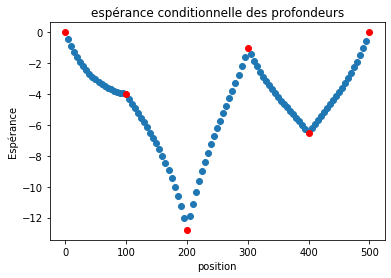

In [112]:
X = [Delta*i for i in unknown_index]

plt.plot(X,Esp_cond, linestyle = '',marker ='o')
plt.plot(observation_index*Delta,profondeur, linestyle = '',marker = 'o', color = 'red')
plt.xlabel('position')
plt.ylabel('Espérance')
plt.title("espérance conditionnelle des profondeurs")
plt.show()

#### 6)

Toujour d'après la question 3 : $CS_X = C_X - C_{X,Y} C_Y^{-1} C_{Y,X}$ avec $CS_X$ la matrice de covariance conditionnelle.

In [19]:
Cov_cond = Cov_incinc - Cov_obsinc.dot(np.linalg.inv(Cov_obsobs)).dot(np.transpose(Cov_obsinc)) #inc pour inconnue

In [20]:
Cov_cond

array([[ 2.16624554e+00,  1.95016959e+00,  1.75361159e+00, ...,
         6.50521303e-19,  1.51788304e-18,  5.42101086e-19],
       [ 1.95016959e+00,  3.91985713e+00,  3.52477392e+00, ...,
         2.16840434e-19,  1.19262239e-18,  1.40946282e-18],
       [ 1.75361159e+00,  3.52477392e+00,  5.33121337e+00, ...,
        -8.67361738e-19, -1.08420217e-19,  2.16840434e-19],
       ...,
       [ 1.08420217e-19, -2.16840434e-19, -1.08420217e-18, ...,
         5.33121337e+00,  3.52477392e+00,  1.75361159e+00],
       [ 7.58941521e-19,  4.33680869e-19, -4.33680869e-19, ...,
         3.52477392e+00,  3.91985713e+00,  1.95016959e+00],
       [ 0.00000000e+00,  9.75781955e-19,  1.08420217e-19, ...,
         1.75361159e+00,  1.95016959e+00,  2.16624554e+00]])

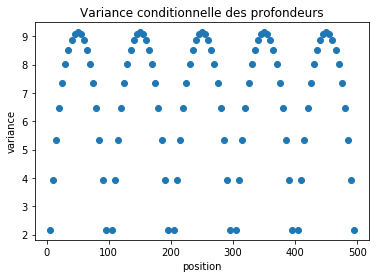

In [113]:
Y = [Cov_cond[i,i] for i,a in enumerate(unknown_index)]
plt.plot(X,Y, marker ='o', linestyle='')
plt.xlabel('position')
plt.ylabel('variance')
plt.title('Variance conditionnelle des profondeurs')
plt.show()

Plus la position est éloignée d'une position ou l'on a éffectué une mesure, plus la variance est grande. Cela traduit que l'estimation de la profondeur en ces position extremes est beaucoup moins précise. C'est cohérent car aux erreurs d'estimations des points précédents s'ajoutent les nouvelles.

#### 7)

In [67]:
def simul():
    Y = []
    for i in unknown_index:
        U = np.random.rand()
        V = np.random.rand()
        Norm = np.sqrt(-2*np.log(U)) * np.cos(2*np.pi*V)
        Y.append(Norm)
    Y = np.array(Y)
    m = Esp_cond
    C = Cov_cond
    
    L = np.linalg.cholesky(C)
    
    Z = m + L.dot(np.transpose(Y))
    return Z

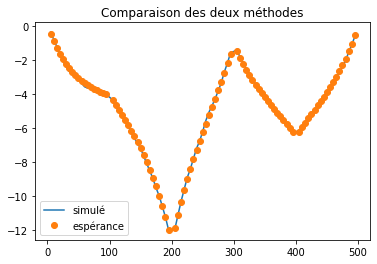

In [114]:
Tot = simul()

n_o = 1000 #on peut faire varier le curseur n_o du nombre d'itération.

for i in range(n_o):
    Tot = Tot + simul()
Tot = Tot/(n_o +1)
plt.plot(X, Tot, label ='simulé')
plt.plot(X,Esp_cond, linestyle = '',marker ='o', label = 'espérance')
plt.legend()
plt.title('Comparaison des deux méthodes')
plt.show()

On voit qu'avec un très grand nombre d'itération, les deux courbes se superposent. C'est le théorème central de la limite. Notre simulation fonctionne bel et bien.

#### 8)

In [78]:
def longueur(Z,Delta):
    L = 0
    for i in range(len(Z)-1):
        L = L + np.sqrt(Delta**2 + (Z[i]-Z[i+1])**2)
    return L

#### 9)

$\textbf {Pour un grand nombre de simulation: (ici on a omit les points mesurés.)}$

In [88]:
L_moy = 0
for i in range(100):
    L = longueur(simul(),Delta)
    L_moy  = L_moy + L
L_moy = L_moy/100
print(f"Longueur éstimée :{L_moy}m.")

Longueur éstimée :491.7501274787787m.


$\textbf {La longueur de l'espérance conditionnelle :}$ 

In [85]:
L_moy = longueur(Esp_cond,Delta)
print(f"longueur de l’espérance conditionnelle : {L_moy}m.")

longueur de l’espérance conditionnelle : 471.390923999467m.


On observe une différence entre les valeurs. Cela vient du fait que bien que l'espérance est une fonction linéaire, on a pas forcément $E(\sqrt X) = \sqrt{E(X)}$:\
On va essayer de régler le problème des points oubliés.

In [89]:
def complet(Vecteur):
    res = N*[0]
    for i,a in enumerate(observation_index):
        res[a] = profondeur[i]
    for i,a in enumerate(unknown_index):
        res[a] = Vecteur[i]
    return np.array(res)

In [90]:
L_moy = 0
for i in range(100):
    L = longueur(complet(simul()),Delta)
    L_moy  = L_moy + L
L_moy = L_moy/100
print(f"Longueur éstimée :{L_moy}m.")

Longueur éstimée :522.3602247518435m.


In [91]:
L_moy = longueur(complet(Esp_cond),Delta)
print(f"longueur de l’espérance conditionnelle : {L_moy}m.")

longueur de l’espérance conditionnelle : 501.6468416918411m.


On observe toujours une différence.

#### 10)

[]

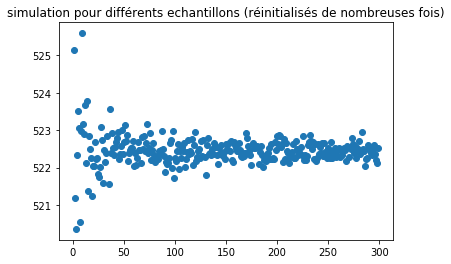

In [115]:
M = []
n_calcul = 300
for i in range(1,n_calcul):
    M_n = 0
    for j in range(i):
        L = longueur(complet(simul()),Delta)
        M_n  = M_n + L
    M_n = M_n/i
    M.append(M_n)
    
plt.scatter([i+1 for i in range(n_calcul-1)],M)
plt.title('simulation pour différents echantillons (réinitialisés de nombreuses fois)')
plt.plot()

On converge très lentement vers une asymptote. Ici cependant on recalcule a chaque itérations de la boucle  principale l'ensemble des termes qui vont participer à la moyenne $M_n$

On peut faire autrement:

In [102]:
Liste_100simulation = [complet(simul()) for i in range(100)]

[]

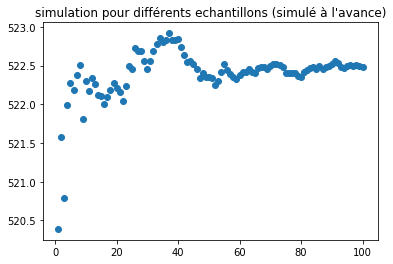

In [116]:
M=[]
Longueur_tot = 0

for i,a in enumerate(Liste_100simulation):
    Longueur_tot += longueur(a,Delta)
    M.append(Longueur_tot/(i+1))
plt.scatter([i+1 for i in range(len(M))],M)
plt.title("simulation pour différents echantillons (simulé à l'avance)")

plt.plot()

#### 13)

On va essayer d'évaluer la probabilité que le cable soit plus long que 525m. Pour cela on va simuler beaucoup de longueur et on va compter combien de fois on dépasse 525m.

In [110]:
Oui = 0
for i in range(10000):
    L = longueur(complet(simul()),Delta)
    if L > 525:
        Oui += 1
print(f"La probabilité que le cable mesure plus de 525m vaut : {Oui/10000}.")

La probabilité que le cable mesure plus de 525m vaut : 0.1865.
